# Homework 1 
### Ghazal Alinezhad Noghre 
### 801202178

## Problem 1

First using pillow library, I loaded images.

In [6]:
import torch
from torchvision import transforms
from PIL import Image
print("Using torch", torch.__version__)

Using torch 1.10.2+cpu


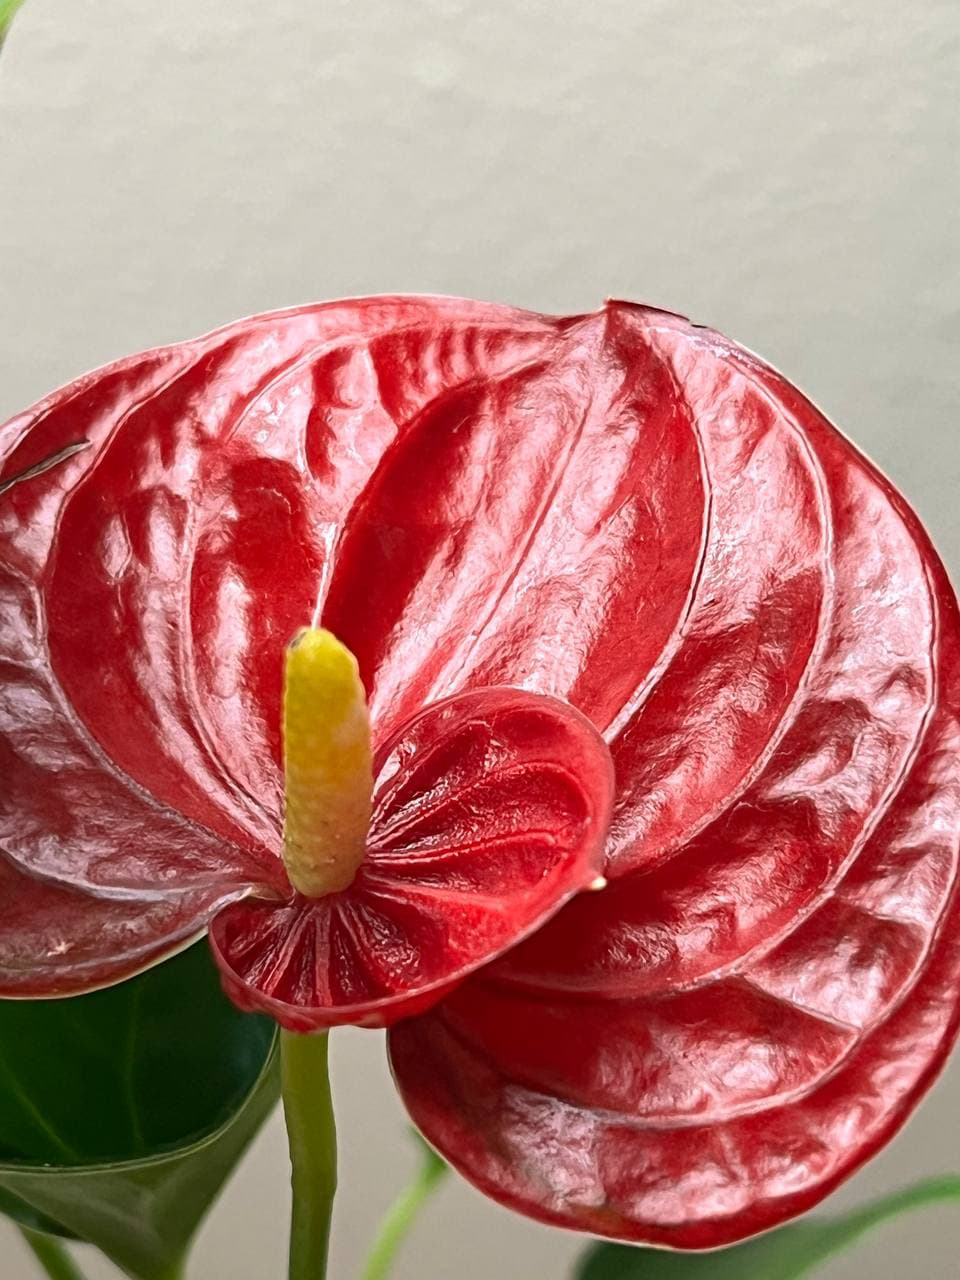

In [9]:
img_red = Image.open("red.jpg")

img_red

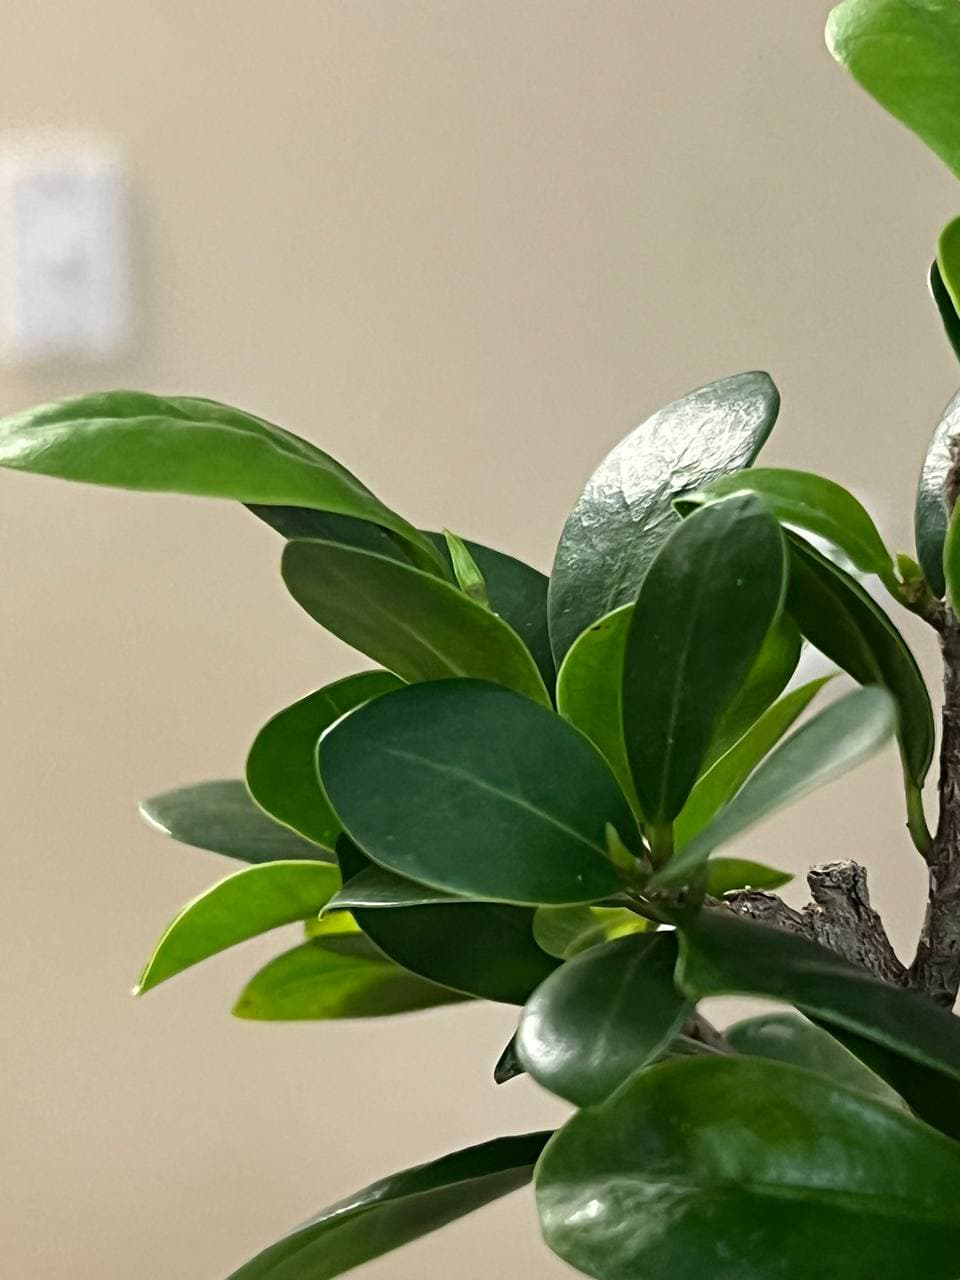

In [10]:
img_green = Image.open("green.jpg")

img_green

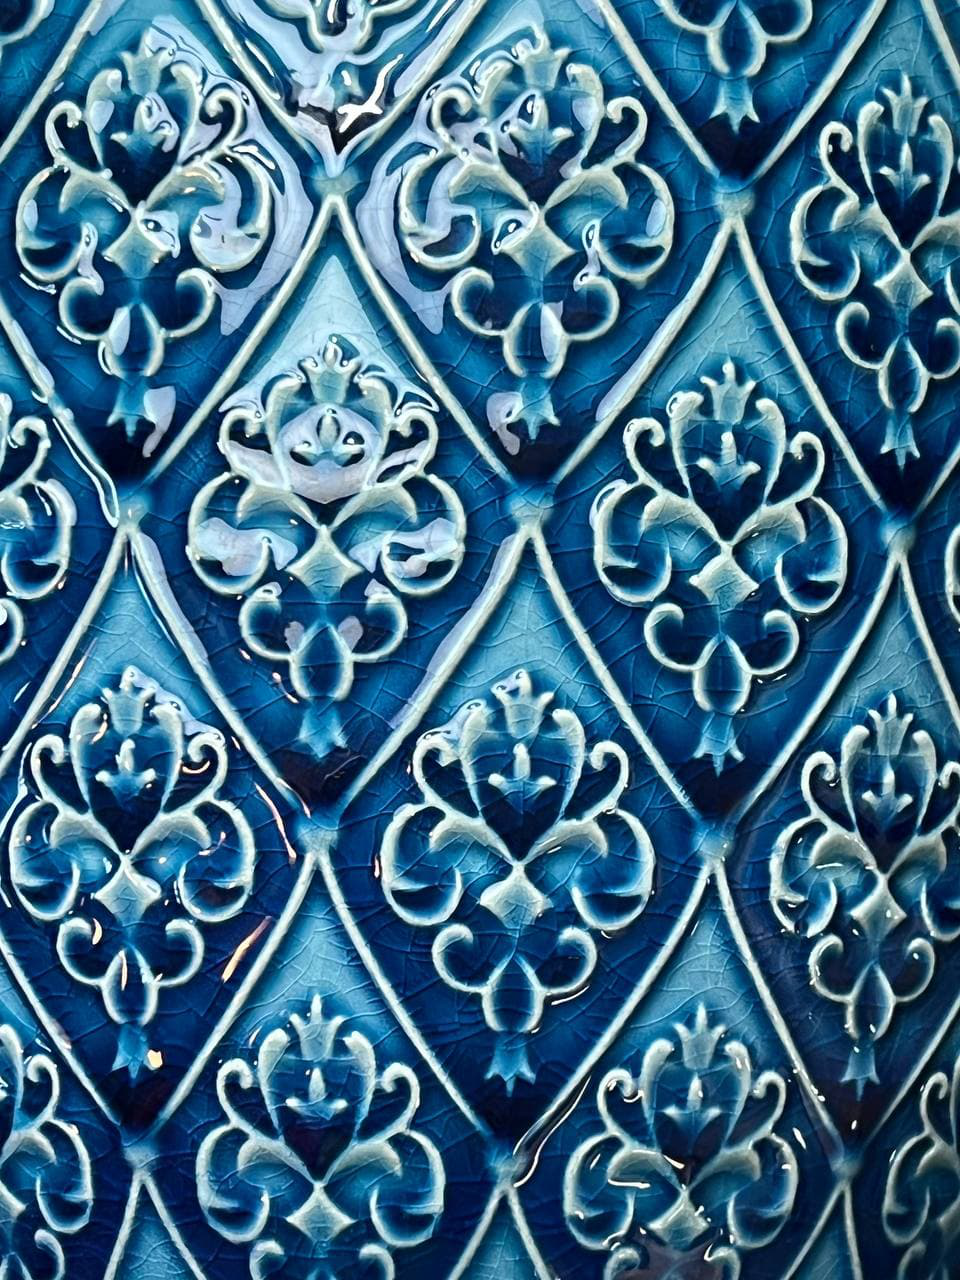

In [11]:
img_blue = Image.open("blue.jpg")

img_blue

Now, I have to convert the images to tensr. Totensor is a method that can simply do that. It also changes the format of the image to (C x H x W) and maps the input values to [0, 1]

In [12]:
convert_tensor = transforms.ToTensor()

In [14]:
tensor_red = convert_tensor(img_red)
tensor_green = convert_tensor(img_green)
tensor_blue = convert_tensor(img_blue)

In [15]:
tensor_red.shape

torch.Size([3, 1280, 960])

I have calculated the mean of each image. As you can see the mean for all of them are close to each other. The brighness is simillar becsuse these images where taken in the same environment.

In [16]:
torch.mean(tensor_red)

tensor(0.5468)

In [17]:
torch.mean(tensor_green)

tensor(0.5157)

In [18]:
torch.mean(tensor_blue)

tensor(0.4033)

Here I have calculated the average over each channel for each image.  With torch.topk we can find the max value and its index. . As you can see in the first image (the red flower) the value of the mean in the first channel is more than other channels. The first channel is probably the R channel.
In the second image (green leaves) the second channel has the biggest mean (the g channel).
And finally, in the third image (blue patterns) the mean of the B channel is the biggest. 
So for categoprizing them based on the color, we can find the channel with max mean, and based on the index of the channel we can decide the prominent color of each image.

In [23]:
torch.mean(tensor_red, dim = [1,2])

tensor([0.7135, 0.4748, 0.4519])

In [36]:
torch.topk(torch.mean(tensor_red, dim = [1,2]), 1).indices[0]

tensor(0)

In [28]:
torch.mean(tensor_green, dim = [1,2])

tensor([0.5495, 0.5657, 0.4319])

In [35]:
torch.topk(torch.mean(tensor_green, dim = [1,2]), 1).indices[0]

tensor(1)

In [24]:
torch.mean(tensor_blue, dim = [1,2])

tensor([0.2481, 0.4244, 0.5376])

In [38]:
torch.topk(torch.mean(tensor_blue, dim = [1,2]), 1).indices[0]

tensor(2)

## Problem 2

Using the example from the lecture I have defined the model, loss fubction, partial derivitives, gradient, and the training loop function. I have defined a new partial derivitive function for w2, and modified the gradient function.

In [202]:
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [203]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

When we have a second degree system such as:  

    w2 * t_u ** 2 + w1 * t_u + b
    
    
Partial derivatives will be modified this way:


dmodel/dw2 = 2 * w2 * t_u


dmodel/dw1 = t_u


dmodel/db = 1

In [204]:
def dloss_fn (t_p, t_c):
    return 2 * (t_p - t_c) / t_p.size(0)

def dmodel_dw2 (t_u, w2, w1, b):
    return 2 * w2 * t_u

def dmodel_dw1 (t_u, w2, w1, b):
    return t_u

def dmodel_db (t_u, w2, w1, b):
    return 1.0

def grad_fn (t_u, t_c, t_p, w2, w1, b):
    dloss_dtp = dloss_fn (t_p, t_c)
    dloss_dw2 = dloss_dtp * dmodel_dw2 (t_u, w2, w1, b) 
    dloss_dw1 = dloss_dtp * dmodel_dw1 (t_u, w2, w1, b)
    dloss_db = dloss_dtp * dmodel_db (t_u, w2, w1, b)
    return torch.stack ([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

def training_loop (n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range (1, n_epochs+1):
        w2, w1, b = params 
        #forward path
        t_p = model (t_u, w2, w1, b)
        loss = loss_fn (t_p, t_c)
        #backward path
        grad = grad_fn (t_u, t_c, t_p, w2, w1, b)
        params = params - learning_rate * grad
        if (epoch % 500 == 0):
            print ("Epoch %d, Loss %f"% (epoch, float(loss)))
    return params

In [205]:
#Normalizing inputs
t_un = 0.1 * t_u

In [206]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-1,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [208]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [209]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-3,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 500, Loss 9.146698
Epoch 1000, Loss 7.500380
Epoch 1500, Loss 6.244924
Epoch 2000, Loss 5.289833
Epoch 2500, Loss 4.564873
Epoch 3000, Loss 4.015790
Epoch 3500, Loss 3.600818
Epoch 4000, Loss 3.287913
Epoch 4500, Loss 3.052536
Epoch 5000, Loss 2.875952


tensor([ 0.4119,  0.6939, -4.9775])

In [210]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 500, Loss 10.335206
Epoch 1000, Loss 10.118582
Epoch 1500, Loss 9.907690
Epoch 2000, Loss 9.702376
Epoch 2500, Loss 9.502537
Epoch 3000, Loss 9.307964
Epoch 3500, Loss 9.118608
Epoch 4000, Loss 8.934264
Epoch 4500, Loss 8.754838
Epoch 5000, Loss 8.580196


tensor([ 0.3325,  0.4565, -0.8956])

We can see that with large learning rates, the model we cannot find the parameters. This is due to the fact that at some point the parameters inside training loop will overflow because the model is not converging. 
But, we can see that if we reduce the learning rate to 0.001, the model converges and the final loss and parameters can be seen above. However if we reduce the learning rate to 1e-4, we can see that the training will be slower due to the fact that we are moving with smaller steps and the final loss is bigger than the training that lerning rate was 0.001.

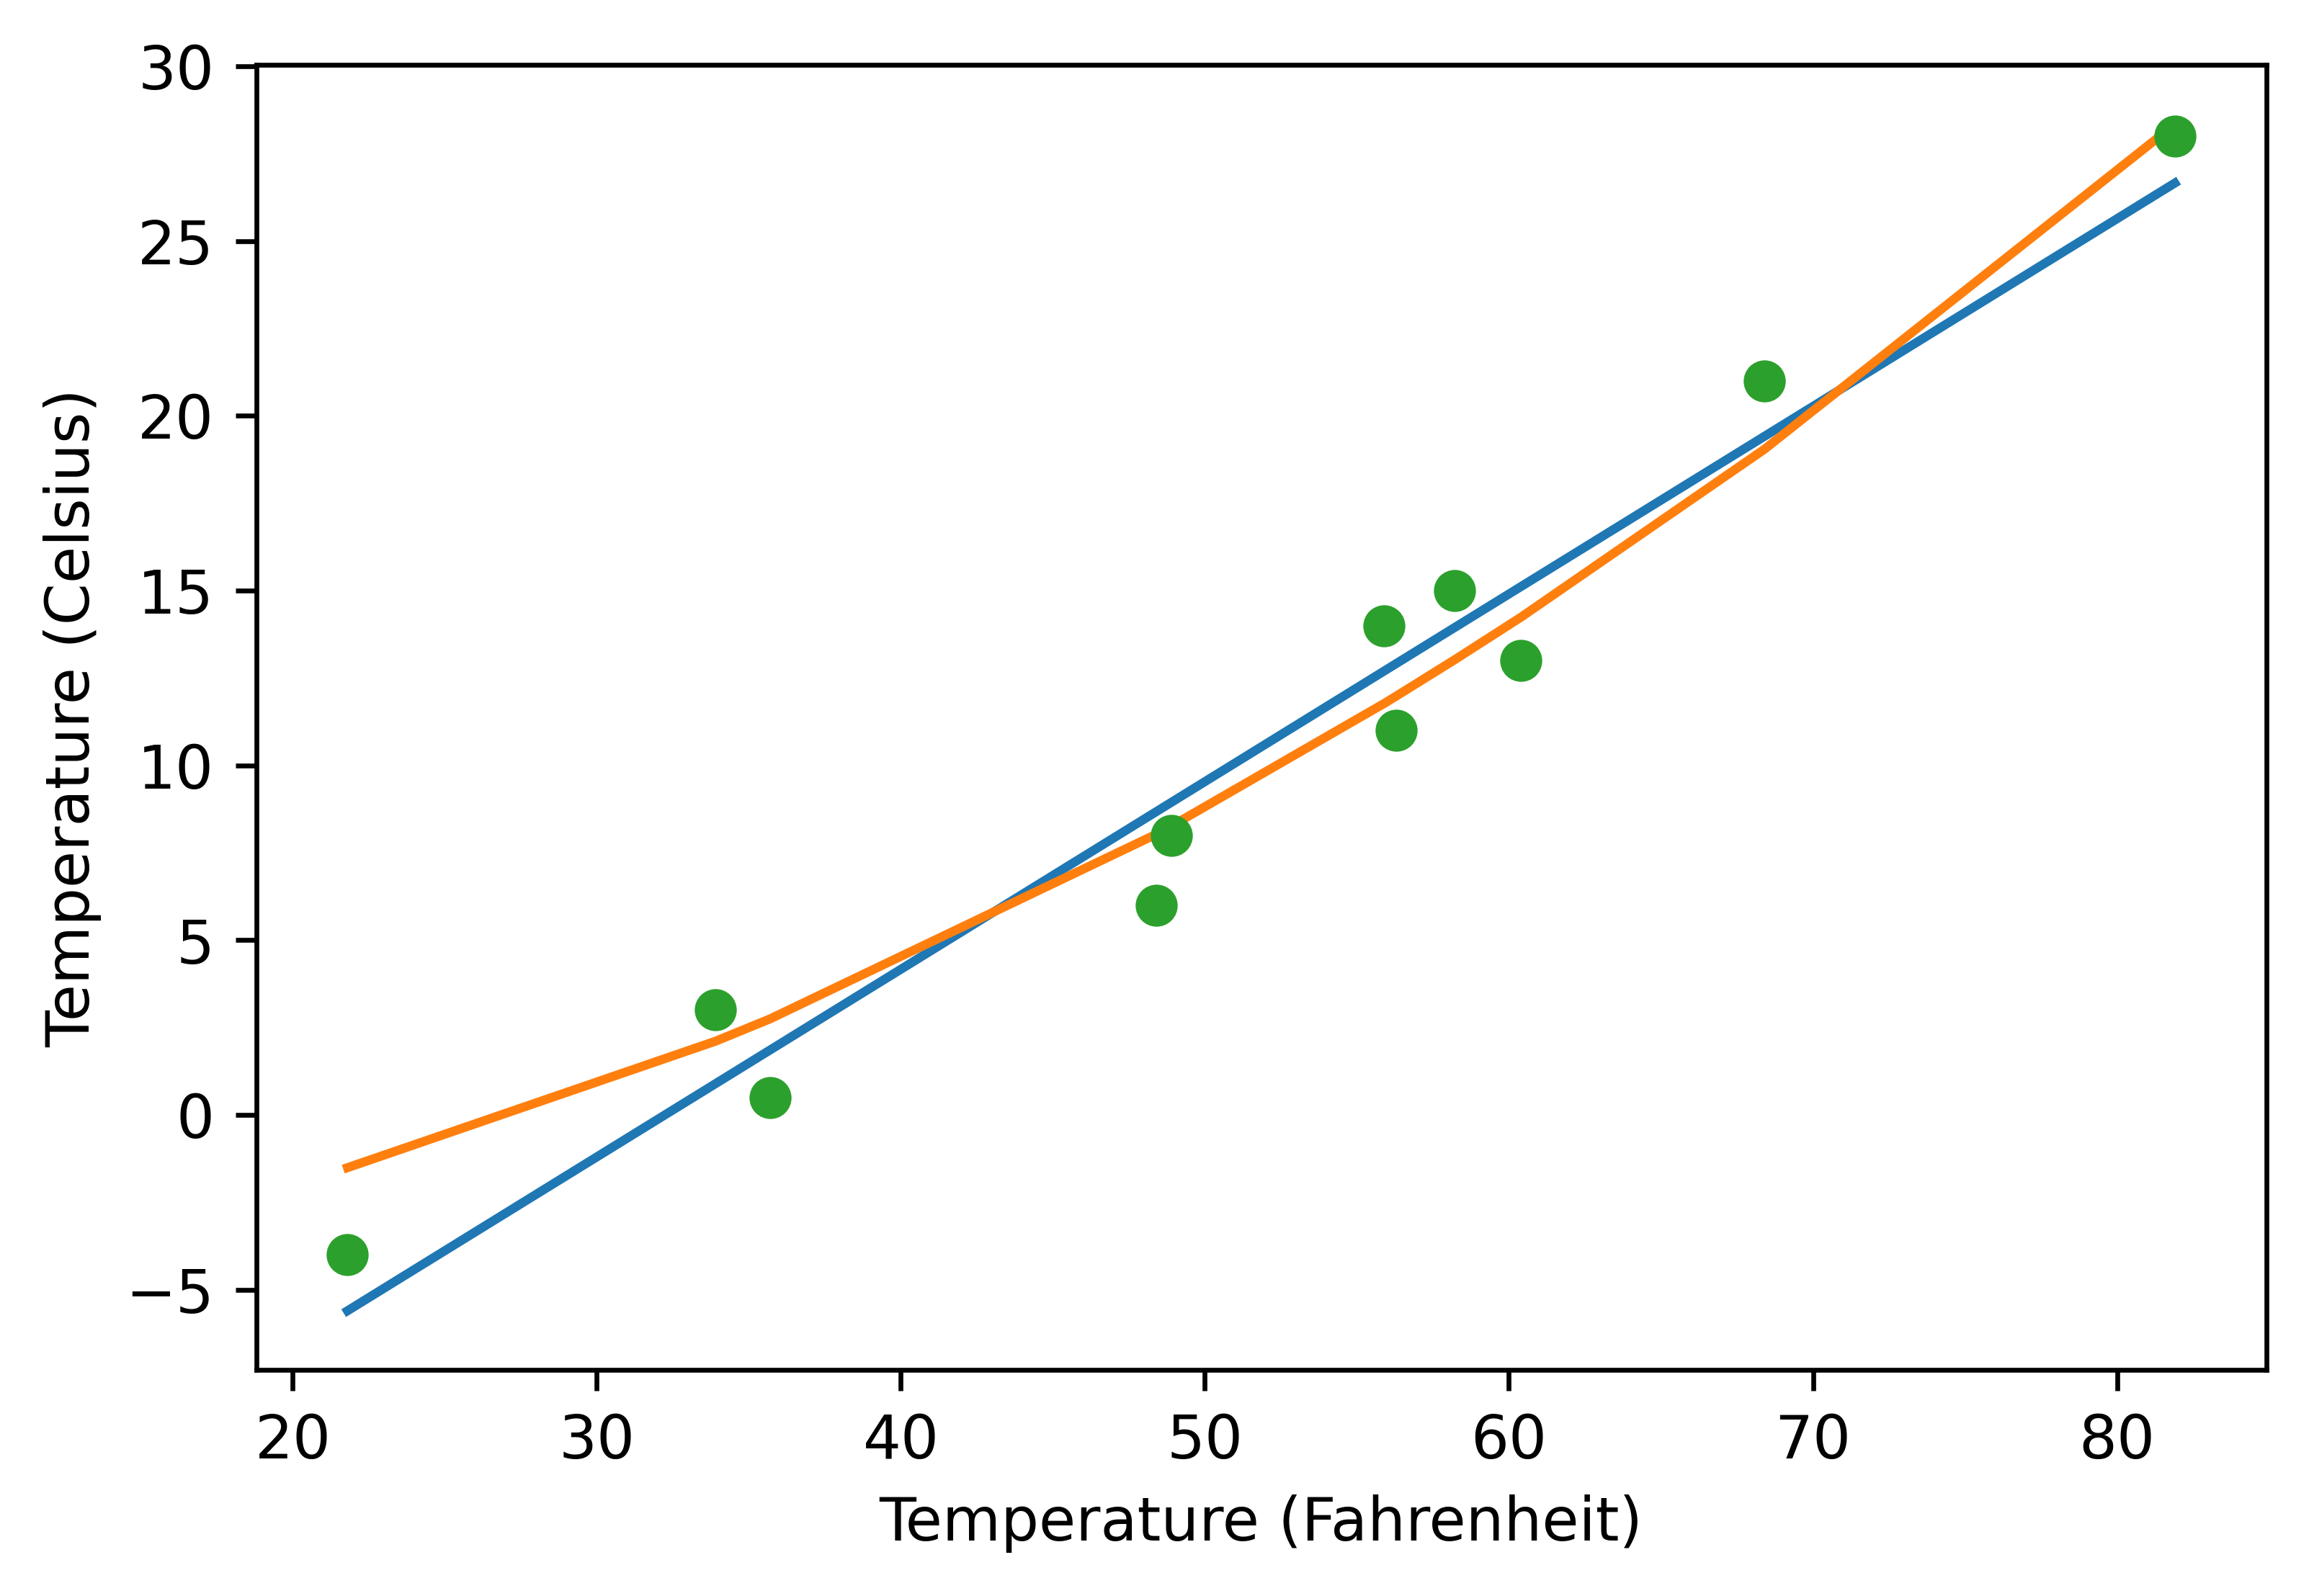

In [114]:
from matplotlib import pyplot as plt
import numpy as np

t_p = model (t_un, 0.4119, 0.6939, -4.9775)
fig = plt.figure (dpi=600)
plt.xlabel ("Temperature (Fahrenheit)")
plt.ylabel ("Temperature (Celsius)")
#Model from lecture with final loss of 2.92
plt.plot (np.sort(t_u.numpy()), np.sort(5.3671*t_un - 17.3012))
#My best model with final loss of 2.87
plt.plot (np.sort(t_u.numpy()), np.sort(t_p.detach().numpy()))
#Original datapoints
plt.plot (t_u.numpy(), t_c.numpy(), "o")

The final loss for the second degree model is slightly smaller than the linear one from the lecture. In the figure above we can see that the non-linear model seems to be too complicated for this problem because the actual relation between Fahrenheit and Celsius is linear itself. So the slightly lower loss has happend because the model is just over-fitted to our datapoints.

# Problem 3

I have used the same approach as the previous problem and modified it to accept input with 5 features. 

In [224]:
def model(x, params):
    return params[5] *x[:,4] + params[4] *x[:,3] + params[3] *x[:,2] + params[2] * x[:,1] + params[1] * x[:,0] + params[0]

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def dloss_fn (t_p, t_c):
    return 2 * (t_p - t_c) / t_p.size(0)

def dmodel_dw5 (x, params):
    return x[:,4]

def dmodel_dw4 (x, params):
    return x[:,3]

def dmodel_dw3 (x, params):
    return x[:,2]

def dmodel_dw2 (x, params):
    return x[:,1]

def dmodel_dw1 (x, params):
    return x[:,0]

def dmodel_db (x, params):
    return 1.0

def grad_fn (x, t_c, t_p, params):
    dloss_dtp = dloss_fn (t_p, t_c)
    dloss_dw5 = dloss_dtp * dmodel_dw5 (x, params)
    dloss_dw4 = dloss_dtp * dmodel_dw4 (x, params) 
    dloss_dw3 = dloss_dtp * dmodel_dw3 (x, params)
    dloss_dw2 = dloss_dtp * dmodel_dw2 (x, params) 
    dloss_dw1 = dloss_dtp * dmodel_dw1 (x, params)
    dloss_db = dloss_dtp * dmodel_db (x, params)
    return torch.stack ([dloss_dw5.sum(), dloss_dw4.sum(), dloss_dw3.sum(), dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

def training_loop (n_epochs, learning_rate, params, x, t_c):
    for epoch in range (1, n_epochs+1):
        #forward path
        t_p = model (x, params)
        loss = loss_fn (t_p, t_c)
        #backward path
        grad = grad_fn (x, t_c, t_p, params)
        params = params - learning_rate * grad
        if (epoch % 500 == 0):
            print ("Epoch %d, Loss %f"% (epoch, float(loss)))
    return params

In [225]:
import pandas as pd

#Loading the data from csv file into pandas dataframe for better visualization
df = pd.read_csv ("Housing.csv")

In [226]:
df

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]

In [227]:
#Converting the dataframe to tensor 
t_c = torch.tensor(df['price'].values,  dtype=torch.float64)
x =  torch.tensor(df[["area", "bedrooms", "bathrooms", "stories", "parking"]].values, dtype=torch.float64)

In [228]:
x.shape

torch.Size([545, 5])

In [229]:
#For column based normalizing dim = 0 
x_n = torch.nn.functional.normalize(x, dim = 0)

In [237]:
t_c.shape

torch.Size([545])

In cells below you can see the training process with different learning rate. The results show that 0.1 is big learning rate and the model will not converge. Then, I reduced the learning rate to 0.001 and the model converged with the final loss of 9830433450953.896484. In the last experiment I chosed the learning rate very small. As you can see the loss has really small changes because the training is so slow. These experiments show that choosing a suitable learning rate has a major role in the training process.


In [230]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-1,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = x_n,
t_c = t_c)

Epoch 500, Loss 35312258246723.898438
Epoch 1000, Loss 675232821815073.875000
Epoch 1500, Loss 13906751557280608.000000
Epoch 2000, Loss 287460873865963808.000000
Epoch 2500, Loss 5943007485501863936.000000
Epoch 3000, Loss 122867584570869661696.000000
Epoch 3500, Loss 2540203612953436487680.000000
Epoch 4000, Loss 52516980241604108353536.000000
Epoch 4500, Loss 1085752812087927115874304.000000
Epoch 5000, Loss 22447200192792868505518080.000000


tensor([-6.0755e+12,  4.5853e+12,  4.2129e+12,  4.8569e+12,  3.3002e+12,
         1.2840e+14], dtype=torch.float64)

In [233]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = x_n,
t_c = t_c)

Epoch 500, Loss 9837360759498.234375
Epoch 1000, Loss 6823991450897.047852
Epoch 1500, Loss 7009708941220.821289
Epoch 2000, Loss 8208745544233.931641
Epoch 2500, Loss 10044963944044.634766
Epoch 3000, Loss 12581284947769.767578
Epoch 3500, Loss 16029685379159.322266
Epoch 4000, Loss 20705326125048.382812
Epoch 4500, Loss 27041255502082.949219
Epoch 5000, Loss 35625338609115.468750


tensor([-3.5136e+06,  7.8119e+06,  7.5155e+06,  7.5007e+06,  6.6447e+06,
         1.7696e+08], dtype=torch.float64)

In [231]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-3,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = x_n,
t_c = t_c)

Epoch 500, Loss 23224064062734.429688
Epoch 1000, Loss 20655034024226.859375
Epoch 1500, Loss 18453711636958.421875
Epoch 2000, Loss 16568940177604.400391
Epoch 2500, Loss 14956724909752.414062
Epoch 3000, Loss 13579231788699.974609
Epoch 3500, Loss 12403926196975.117188
Epoch 4000, Loss 11402832128657.425781
Epoch 4500, Loss 10551894978957.667969
Epoch 5000, Loss 9830433450953.896484


tensor([  971676.2269,  1503616.4399,  1542409.8056,  1531664.5725,
         1523684.0404, 35423078.1438], dtype=torch.float64)

In [234]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = x_n,
t_c = t_c)

Epoch 500, Loss 25893844077270.648438
Epoch 1000, Loss 25578098911257.945312
Epoch 1500, Loss 25267159564219.476562
Epoch 2000, Loss 24960954452854.398438
Epoch 2500, Loss 24659413064833.539062
Epoch 3000, Loss 24362465942790.812500
Epoch 3500, Loss 24070044668553.945312
Epoch 4000, Loss 23782081847610.988281
Epoch 4500, Loss 23498511093809.011719
Epoch 5000, Loss 23219267014281.632812


tensor([ 145345.3397,  192647.0061,  198935.5805,  198758.5594,  198329.9536,
        4614398.7850], dtype=torch.float64)

In [232]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-5,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = x_n,
t_c = t_c)

Epoch 500, Loss 26181603304839.312500
Epoch 1000, Loss 26149369872073.582031
Epoch 1500, Loss 26117185810584.406250
Epoch 2000, Loss 26085051046324.601562
Epoch 2500, Loss 26052965505358.503906
Epoch 3000, Loss 26020929113861.820312
Epoch 3500, Loss 25988941798121.468750
Epoch 4000, Loss 25957003484535.363281
Epoch 4500, Loss 25925114099612.308594
Epoch 5000, Loss 25893273569971.792969


tensor([ 15139.1345,  19804.4156,  20463.4272,  20457.6693,  20418.0523,
        475113.8924], dtype=torch.float64)

Since the data has 5 input dimensions, it is not possible to plot the values and the final model. 